1. Importação das Bibliotecas Necessárias
Primeiro, importamos todas as bibliotecas que serão utilizadas ao longo do notebook.

In [1]:
# Importação de bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para pré-processamento
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Bibliotecas para construção e treinamento do modelo
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Biblioteca para lidar com feriados
import holidays

# Ignorar avisos para uma saída mais limpa
import warnings
warnings.filterwarnings('ignore')


2024-11-12 21:47:04.588925: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731458824.709453   53904 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731458824.740803   53904 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-12 21:47:04.919837: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2. Carregamento e Inspeção dos Dados
Carregamos o arquivo CSV contendo os dados de transação e realizamos uma inspeção inicial para entender a estrutura dos dados.

In [2]:
# Definir o caminho do arquivo CSV
csv_path = '../data/dados_transacao_26173.csv'

# Carregar o CSV
df = pd.read_csv(csv_path)

# Exibir as primeiras linhas do dataset
print("Primeiras linhas do dataset:")
display(df.head())

# Informações gerais sobre o dataset
print("\nInformações gerais do dataset:")
print(df.info())

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
display(df.describe())


Primeiras linhas do dataset:


,CodigoVenda,Data,DataHora,Status,VendaCancelada,TotalPedido,DescontoGeral,AcrescimoGeral,TotalCusto,CodigoProduto,...,ValorCustoGerencial,CodigoFornecedor,CodigoKitPrincipal,ValorKitPrincipal,EmPromocao,DiaDaSemana,Mes,Dia,Feriado,VesperaDeFeriado
0,2263035,2019-01-02,2019-01-02 08:36:25,f,0,58.08,0.0,0.0,27.30,26173,...,1.5,0,0,0,0,2,1,2,0,0
1,2263063,2019-01-02,2019-01-02 09:01:27,f,0,40.05,0.0,0.0,29.45,26173,...,1.5,0,0,0,0,2,1,2,0,0
2,2263067,2019-01-02,2019-01-02 09:06:07,f,0,34.75,0.0,0.0,26.94,26173,...,1.5,0,0,0,0,2,1,2,0,0
3,2263151,2019-01-02,2019-01-02 09:55:52,f,0,210.10,0.0,0.0,146.63,26173,...,1.5,0,0,0,0,2,1,2,0,0
4,2263159,2019-01-02,2019-01-02 10:01:20,f,0,96.72,0.0,0.0,60.43,26173,...,1.5,0,0,0,0,2,1,2,0,0



Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117192 entries, 0 to 117191
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CodigoVenda          117192 non-null  int64  
 1   Data                 117192 non-null  object 
 2   DataHora             117192 non-null  object 
 3   Status               117192 non-null  object 
 4   VendaCancelada       117192 non-null  int64  
 5   TotalPedido          117190 non-null  float64
 6   DescontoGeral        117192 non-null  float64
 7   AcrescimoGeral       117192 non-null  float64
 8   TotalCusto           117192 non-null  float64
 9   CodigoProduto        117192 non-null  int64  
 10  Quantidade           117192 non-null  float64
 11  ValorUnitario        117192 non-null  float64
 12  ValorTotal           117192 non-null  float64
 13  Desconto             117192 non-null  float64
 14  Acrescimo            117192 non-null

,CodigoVenda,VendaCancelada,TotalPedido,DescontoGeral,AcrescimoGeral,TotalCusto,CodigoProduto,Quantidade,ValorUnitario,ValorTotal,...,ValorCustoGerencial,CodigoFornecedor,CodigoKitPrincipal,ValorKitPrincipal,EmPromocao,DiaDaSemana,Mes,Dia,Feriado,VesperaDeFeriado
count,1.171920e+05,117192.000000,117190.000000,117192.0,117192.0,117192.000000,117192.0,117192.000000,117192.000000,117192.000000,...,117192.000000,117192.000000,117192.0,117192.0,117192.000000,117192.000000,117192.000000,117192.000000,117192.000000,117192.000000
mean,3.542673e+06,0.000734,220.880381,0.0,0.0,163.759094,26173.0,1.410600,2.249984,3.187963,...,1.594766,14.557222,0.0,0.0,0.070696,3.355971,6.196182,15.685260,0.007603,0.054543
std,7.091584e+05,0.027080,255.111260,0.0,0.0,297.898729,0.0,2.207204,0.689172,5.257571,...,0.497781,1062.373533,0.0,0.0,0.256317,1.915065,3.609532,8.935082,0.086863,0.227087
min,2.263035e+06,0.000000,-249.980000,0.0,0.0,-181.330000,26173.0,-90.000000,-3.550000,-193.500000,...,0.600000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,3.020720e+06,0.000000,56.462500,0.0,0.0,40.567500,26173.0,1.000000,1.950000,1.990000,...,1.500000,0.000000,0.0,0.0,0.000000,2.000000,3.000000,8.000000,0.000000,0.000000
50%,3.522943e+06,0.000000,133.545000,0.0,0.0,95.645000,26173.0,1.000000,2.110000,2.150000,...,1.500000,0.000000,0.0,0.0,0.000000,4.000000,6.000000,16.000000,0.000000,0.000000
75%,4.128652e+06,0.000000,289.540000,0.0,0.0,208.232500,26173.0,1.000000,2.790000,3.550000,...,2.000000,0.000000,0.0,0.0,0.000000,5.000000,9.000000,24.000000,0.000000,0.000000
max,4.890548e+06,1.000000,3660.680000,0.0,0.0,35127.070000,26173.0,364.000000,19.150000,979.160000,...,3.000000,77545.000000,0.0,0.0,1.000000,6.000000,12.000000,31.000000,1.000000,1.000000


3. Pré-processamento dos Dados
Nesta etapa, convertemos a coluna de datas para o formato datetime, lidamos com valores faltantes e agregamos os dados por dia.

In [3]:
# Converter a coluna 'Data' para datetime
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')

# Verificar valores faltantes
print("\nValores faltantes por coluna:")
print(df.isnull().sum())

# Selecionar as colunas de interesse: 'Data', 'ValorUnitario', 'Quantidade'
daily_df = df.groupby('Data').agg({
    'ValorUnitario': 'mean',  # Média do valor unitário por dia
    'Quantidade': 'sum'       # Quantidade total vendida por dia
}).reset_index()

# Exibir as primeiras linhas do dataframe agregado
print("\nPrimeiras linhas do dataframe agregado por dia:")
display(daily_df.head())

# Verificar se há datas faltantes
all_dates = pd.date_range(start=daily_df['Data'].min(), end=daily_df['Data'].max(), freq='D')
daily_df = daily_df.set_index('Data').reindex(all_dates).fillna(method='ffill').reset_index()
daily_df.rename(columns={'index': 'Data'}, inplace=True)

# Confirmar a ausência de datas faltantes
print("\nValores faltantes após reindexação:")
print(daily_df.isnull().sum())



Valores faltantes por coluna:
CodigoVenda            0
Data                   0
DataHora               0
Status                 0
VendaCancelada         0
TotalPedido            2
DescontoGeral          0
AcrescimoGeral         0
TotalCusto             0
CodigoProduto          0
Quantidade             0
ValorUnitario          0
ValorTotal             0
Desconto               0
Acrescimo              0
ItemCancelado          0
QuantDevolvida         0
PrecoemPromocao        0
CodigoSecao            0
CodigoGrupo            0
CodigoSubGrupo         0
CodigoFabricante       0
ValorCusto             0
ValorCustoGerencial    0
CodigoFornecedor       0
CodigoKitPrincipal     0
ValorKitPrincipal      0
EmPromocao             0
DiaDaSemana            0
Mes                    0
Dia                    0
Feriado                0
VesperaDeFeriado       0
dtype: int64

Primeiras linhas do dataframe agregado por dia:


,Data,ValorUnitario,Quantidade
0,2019-01-02,1.978571,80.0
1,2019-01-03,1.978333,90.0
2,2019-01-04,1.981918,136.0
3,2019-01-05,1.981000,144.0
4,2019-01-06,1.982542,74.0



Valores faltantes após reindexação:
Data             0
ValorUnitario    0
Quantidade       0
dtype: int64


4. Engenharia de Features
Adicionamos features derivadas da data que podem ajudar na previsão, como dia, mês, ano, dia da semana e feriados.

In [4]:
# Adicionar features derivadas da data
daily_df['Dia'] = daily_df['Data'].dt.day
daily_df['Mes'] = daily_df['Data'].dt.month
daily_df['Ano'] = daily_df['Data'].dt.year
daily_df['DiaDaSemana'] = daily_df['Data'].dt.dayofweek  # 0: Segunda, 6: Domingo

# Inicializar feriados do Brasil
br_holidays = holidays.BR()

# Adicionar coluna de feriado: 1 se feriado, 0 caso contrário
daily_df['Feriado'] = daily_df['Data'].isin(br_holidays).astype(int)

# Exibir as primeiras linhas com as novas features
print("\nDataframe com features adicionais:")
display(daily_df.head())



Dataframe com features adicionais:


,Data,ValorUnitario,Quantidade,Dia,Mes,Ano,DiaDaSemana,Feriado
0,2019-01-02,1.978571,80.0,2,1,2019,2,0
1,2019-01-03,1.978333,90.0,3,1,2019,3,0
2,2019-01-04,1.981918,136.0,4,1,2019,4,0
3,2019-01-05,1.981000,144.0,5,1,2019,5,0
4,2019-01-06,1.982542,74.0,6,1,2019,6,0


5. Divisão dos Dados
Dividimos os dados em conjuntos de treino inicial, treino continuado/validação e teste conforme a estratégia descrita.

In [5]:
# Definir as datas de corte
train_end = '2022-12-31'
continue_train_end = '2023-12-31'
test_start = '2024-01-01'
test_end = '2024-03-30'

# Separar os dados
train_df = daily_df[daily_df['Data'] <= train_end]
continue_train_df = daily_df[(daily_df['Data'] > train_end) & (daily_df['Data'] <= continue_train_end)]
test_df = daily_df[(daily_df['Data'] >= test_start) & (daily_df['Data'] <= test_end)]

# Exibir o número de registros em cada conjunto
print(f"\nTreino Inicial: {train_df.shape[0]} registros")
print(f"Treino Continuado: {continue_train_df.shape[0]} registros")
print(f"Teste: {test_df.shape[0]} registros")



Treino Inicial: 1460 registros
Treino Continuado: 365 registros
Teste: 90 registros


6. Escalonamento dos Dados
Escalonamos os dados para melhorar o desempenho do modelo LSTM. Utilizamos o MinMaxScaler para normalizar as features e os targets entre 0 e 1.

In [6]:
# Selecionar as features e os targets
features = ['Dia', 'Mes', 'Ano', 'DiaDaSemana', 'Feriado']
targets = ['ValorUnitario', 'Quantidade']

# Inicializar o scaler
scaler = MinMaxScaler()

# Ajustar o scaler apenas nos dados de treino inicial
scaler.fit(train_df[features + targets])

# Escalonar os conjuntos de dados
train_scaled = scaler.transform(train_df[features + targets])
continue_train_scaled = scaler.transform(continue_train_df[features + targets])
test_scaled = scaler.transform(test_df[features + targets])

# Exibir uma amostra dos dados escalonados
print("\nAmostra dos dados escalonados de treino:")
display(pd.DataFrame(train_scaled, columns=features + targets).head())



Amostra dos dados escalonados de treino:


,Dia,Mes,Ano,DiaDaSemana,Feriado,ValorUnitario,Quantidade
0,0.033333,0.0,0.0,0.333333,0.0,0.371051,0.159836
1,0.066667,0.0,0.0,0.500000,0.0,0.370977,0.180328
2,0.100000,0.0,0.0,0.666667,0.0,0.372096,0.274590
3,0.133333,0.0,0.0,0.833333,0.0,0.371809,0.290984
4,0.166667,0.0,0.0,1.000000,0.0,0.372291,0.147541


7. Criação de Sequências para o LSTM
Os modelos LSTM requerem sequências temporais como entrada. Criamos sequências de um determinado comprimento (por exemplo, 30 dias) para prever os valores do próximo dia.

In [7]:
# Função para criar sequências
def create_sequences(data, seq_length=30):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, :len(features)])
        y.append(data[i, len(features):])
    return np.array(X), np.array(y)

SEQ_LENGTH = 30  # Número de dias usados para prever

# Criar sequências de treino
X_train, y_train = create_sequences(train_scaled, SEQ_LENGTH)
print(f"\nForma de X_train: {X_train.shape}, y_train: {y_train.shape}")

# Criar sequências de treino continuado
X_continue_train, y_continue_train = create_sequences(continue_train_scaled, SEQ_LENGTH)
print(f"Forma de X_continue_train: {X_continue_train.shape}, y_continue_train: {y_continue_train.shape}")

# Para o conjunto de teste, combinamos treino e treino continuado para garantir a sequência
combined_scaled = np.concatenate((train_scaled, continue_train_scaled), axis=0)
X_test, y_test = create_sequences(combined_scaled, SEQ_LENGTH)

# Ajustar para corresponder ao período de teste
X_test = X_test[-len(test_scaled) + SEQ_LENGTH:]
y_test = y_test[-len(test_scaled) + SEQ_LENGTH:]
print(f"Forma de X_test: {X_test.shape}, y_test: {y_test.shape}")



Forma de X_train: (1430, 30, 5), y_train: (1430, 2)
Forma de X_continue_train: (335, 30, 5), y_continue_train: (335, 2)
Forma de X_test: (60, 30, 5), y_test: (60, 2)


8. Construção do Modelo LSTM
Construímos e compilamos o modelo LSTM. A arquitetura pode ser ajustada conforme necessário.

In [8]:
# Definir a arquitetura do modelo
model = Sequential()

# Primeira camada LSTM com Dropout
model.add(LSTM(64, return_sequences=True, input_shape=(SEQ_LENGTH, len(features))))
model.add(Dropout(0.2))  # Dropout para evitar overfitting

# Segunda camada LSTM com Dropout
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))

# Camada densa intermediária
model.add(Dense(16, activation='relu'))

# Camada de saída com duas unidades (ValorUnitario e Quantidade)
model.add(Dense(len(targets)))

# Compilar o modelo
model.compile(optimizer='adam', loss='mse')

# Exibir o resumo do modelo
print("\nResumo do modelo LSTM:")
model.summary()


I0000 00:00:1731458829.107252   53904 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2561 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5



Resumo do modelo LSTM:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,898 (120.70 KB)

 Trainable params: 30,898 (120.70 KB)

 Non-trainable params: 0 (0.00 B)

9. Treinamento Inicial do Modelo
Treinamos o modelo utilizando os dados de treino inicial (01/01/2019 a 31/12/2022).

In [9]:
# Definir callbacks, como EarlyStopping para evitar overfitting
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Treinar o modelo
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50


I0000 00:00:1731458834.354099   54112 cuda_dnn.cc:529] Loaded cuDNN version 90501


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0445 - val_loss: 0.0062
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0201 - val_loss: 0.0059
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0177 - val_loss: 0.0075
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0169 - val_loss: 0.0119
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0168 - val_loss: 0.0108
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0165 - val_loss: 0.0102
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0167 - val_loss: 0.0087


Visualização da Perda durante o Treinamento:

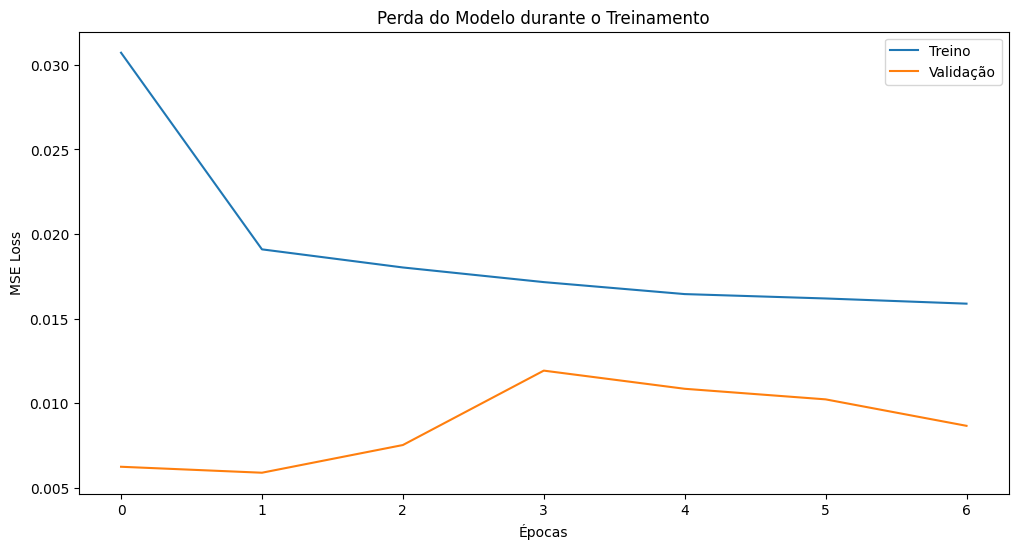

In [10]:
# Plotar a perda de treino e validação
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda do Modelo durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


10. Continuação do Treinamento com Dados Atualizados
Continuamos o treinamento do modelo utilizando os dados de 2023 (01/01/2023 a 31/12/2023), permitindo que o modelo se ajuste a novas tendências.

In [11]:
# Criar sequências para treino continuado (já criado anteriormente)

# Treinar novamente o modelo com os novos dados
history_continue = model.fit(
    X_continue_train, y_continue_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0183 - val_loss: 0.0622
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0155 - val_loss: 0.0852
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0130 - val_loss: 0.0891
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0133 - val_loss: 0.0679
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0137 - val_loss: 0.0754


Visualização da Perda durante a Continuação do Treinamento:

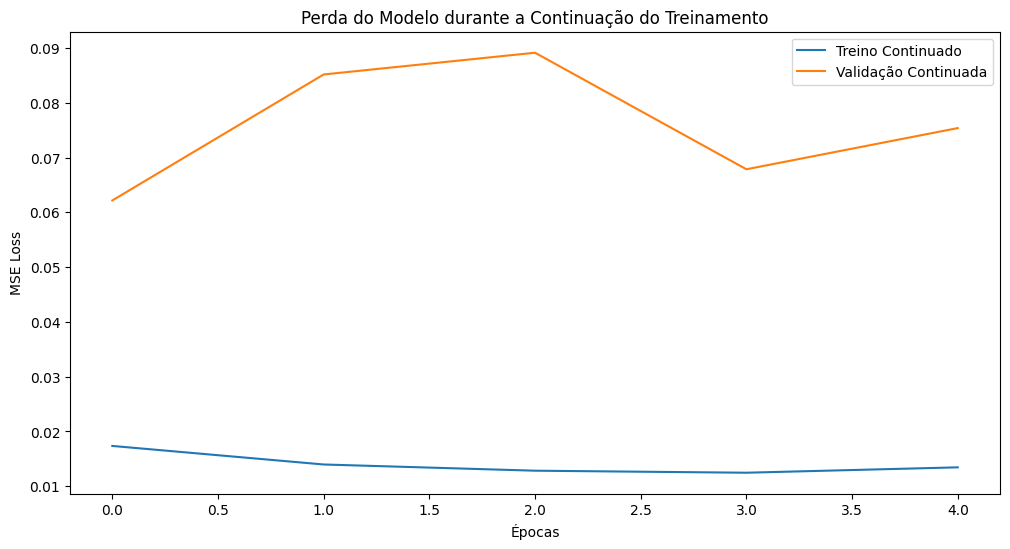

In [12]:
# Plotar a perda de treino e validação durante a continuação do treinamento
plt.figure(figsize=(12,6))
plt.plot(history_continue.history['loss'], label='Treino Continuado')
plt.plot(history_continue.history['val_loss'], label='Validação Continuada')
plt.title('Perda do Modelo durante a Continuação do Treinamento')
plt.xlabel('Épocas')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


11. Previsão e Avaliação do Modelo
Realizamos previsões para o período de teste (01/01/2024 a 30/03/2024) e avaliamos o desempenho do modelo utilizando métricas como MSE e MAE.

In [13]:
# Realizar previsões
predictions = model.predict(X_test)

# Inverter o escalonamento das previsões
# Para isso, concatenamos zeros para as features antes de aplicar a inversão
zeros_features = np.zeros((predictions.shape[0], len(features)))
predictions_full = np.concatenate((zeros_features, predictions), axis=1)
predictions_inverse = scaler.inverse_transform(predictions_full)[:, -len(targets):]

# Inverter o escalonamento dos valores reais
y_test_full = np.concatenate((np.zeros((y_test.shape[0], len(features))), y_test), axis=1)
y_test_inverse = scaler.inverse_transform(y_test_full)[:, -len(targets):]

# Criar DataFrame para comparação
comparison_df = test_df.iloc[SEQ_LENGTH:].copy().reset_index(drop=True)
comparison_df['ValorUnitario_Previsto'] = predictions_inverse[:, 0]
comparison_df['Quantidade_Prevista'] = predictions_inverse[:, 1]

# Avaliar o modelo utilizando MSE e MAE
mse_valor = mean_squared_error(comparison_df['ValorUnitario'], comparison_df['ValorUnitario_Previsto'])
mae_valor = mean_absolute_error(comparison_df['ValorUnitario'], comparison_df['ValorUnitario_Previsto'])

mse_quant = mean_squared_error(comparison_df['Quantidade'], comparison_df['Quantidade_Prevista'])
mae_quant = mean_absolute_error(comparison_df['Quantidade'], comparison_df['Quantidade_Prevista'])

print(f"\nAvaliação do Modelo:")
print(f"Valor Unitário - MSE: {mse_valor:.4f}, MAE: {mae_valor:.4f}")
print(f"Quantidade Vendida - MSE: {mse_quant:.4f}, MAE: {mae_quant:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step

Avaliação do Modelo:
Valor Unitário - MSE: 1.3588, MAE: 1.1563
Quantidade Vendida - MSE: 2912.3787, MAE: 40.7587


12. Visualização dos Resultados
Visualizamos as previsões comparadas com os valores reais para uma melhor compreensão do desempenho do modelo.

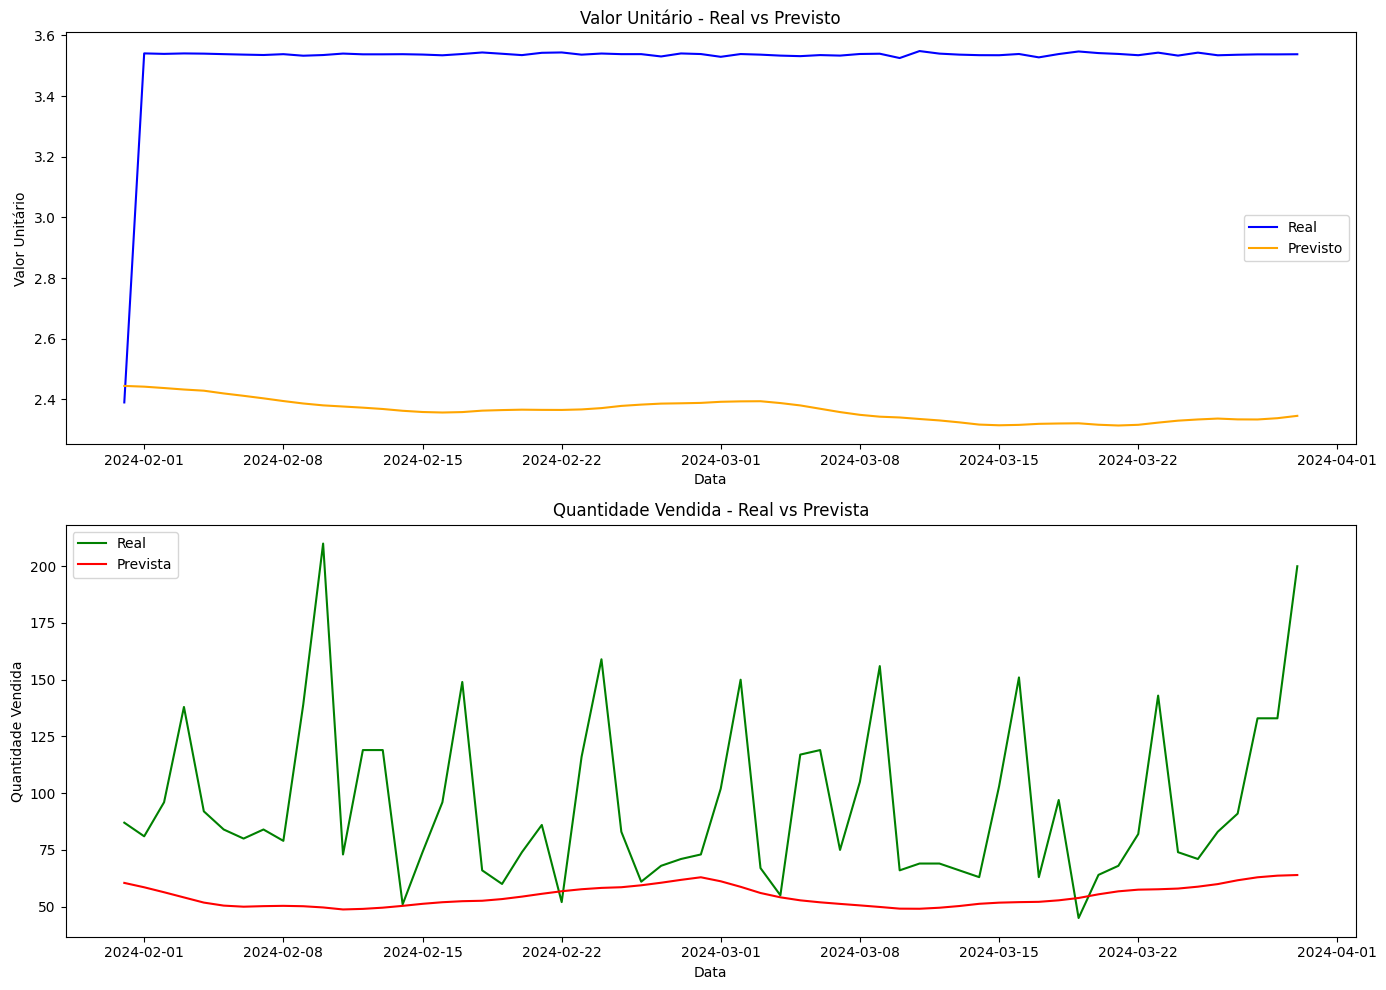

In [14]:
# Configurar o tamanho dos gráficos
plt.figure(figsize=(14,10))

# Valor Unitário
plt.subplot(2,1,1)
plt.plot(comparison_df['Data'], comparison_df['ValorUnitario'], label='Real', color='blue')
plt.plot(comparison_df['Data'], comparison_df['ValorUnitario_Previsto'], label='Previsto', color='orange')
plt.title('Valor Unitário - Real vs Previsto')
plt.xlabel('Data')
plt.ylabel('Valor Unitário')
plt.legend()

# Quantidade Vendida
plt.subplot(2,1,2)
plt.plot(comparison_df['Data'], comparison_df['Quantidade'], label='Real', color='green')
plt.plot(comparison_df['Data'], comparison_df['Quantidade_Prevista'], label='Prevista', color='red')
plt.title('Quantidade Vendida - Real vs Prevista')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.legend()

plt.tight_layout()
plt.show()


Gráfico de Erro Absoluto:

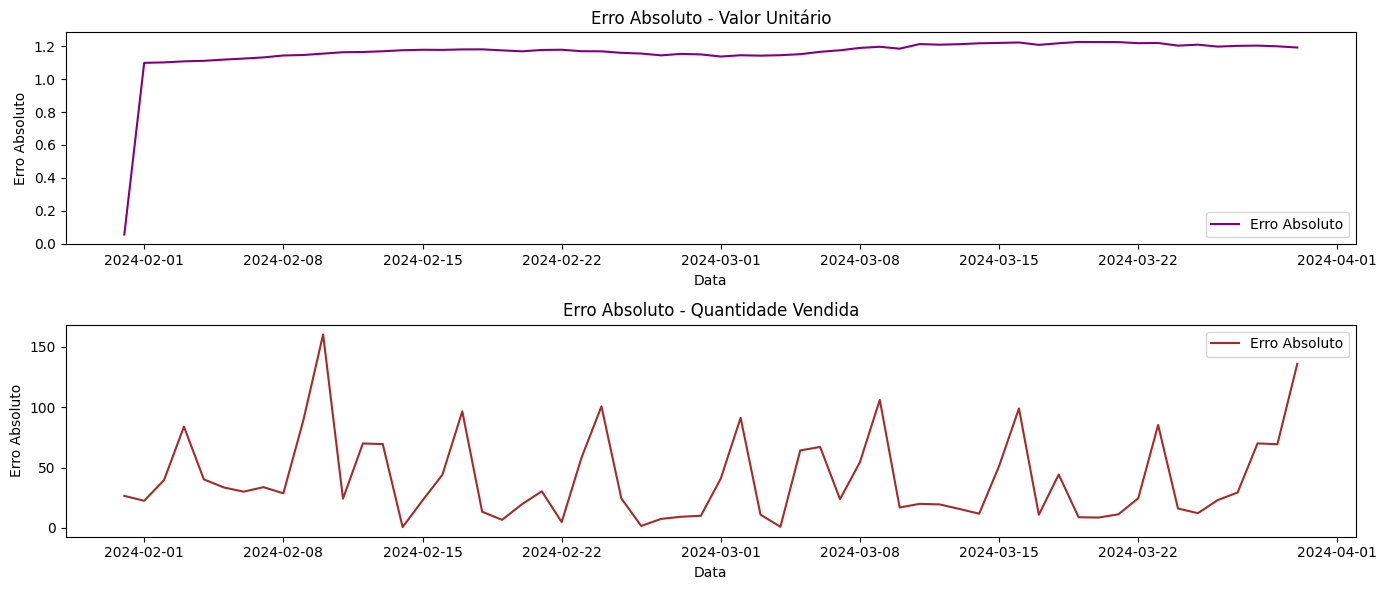

In [15]:
# Calcular erro absoluto
comparison_df['Erro_ValorUnitario'] = abs(comparison_df['ValorUnitario'] - comparison_df['ValorUnitario_Previsto'])
comparison_df['Erro_Quantidade'] = abs(comparison_df['Quantidade'] - comparison_df['Quantidade_Prevista'])

plt.figure(figsize=(14,6))

# Erro no Valor Unitário
plt.subplot(2,1,1)
plt.plot(comparison_df['Data'], comparison_df['Erro_ValorUnitario'], label='Erro Absoluto', color='purple')
plt.title('Erro Absoluto - Valor Unitário')
plt.xlabel('Data')
plt.ylabel('Erro Absoluto')
plt.legend()

# Erro na Quantidade Vendida
plt.subplot(2,1,2)
plt.plot(comparison_df['Data'], comparison_df['Erro_Quantidade'], label='Erro Absoluto', color='brown')
plt.title('Erro Absoluto - Quantidade Vendida')
plt.xlabel('Data')
plt.ylabel('Erro Absoluto')
plt.legend()

plt.tight_layout()
plt.show()
